In [2]:
# Make module from local packages importable
import os
os.chdir('/home/mhoerold/entrack')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import bisect

In [9]:
file_path = "data/raw/csv/adni_aibl_exact_age.csv"
df = pd.read_csv(file_path)

In [10]:
data_dic = df.to_dict('records')

## Distribution of time intervals between images of the same patient

### All possible pairs

In [5]:
df.columns

Index(['health_ad', 'patient_label', 'sex', 'health_emci', 'mri_manufacturer',
       'health_lmci', 'health_smc', 'dataset', 'health_mci',
       'study_patient_id', 'healthy', 'age', 'study_id', 'mri_field_strength',
       'study_image_id', 'image_label', 'age_exact', 'weighting'],
      dtype='object')

In [11]:
patients = df.patient_label.unique()

In [14]:
def all_age_differences(patients, diag_pair, reduce_same_day_images=False):
    diffs = []
    labels = []
    for pat in patients:
        cur_df = df.loc[df.patient_label == pat]
        cur_df = cur_df.sort_values(by=['age_exact'])
        records = cur_df.to_dict('records')
        
        if reduce_same_day_images:
            to_remove = list()
            for i in range(1, len(records)):
                if records[i]['age_exact'] == records[i - 1]['age_exact']:
                    to_remove.append(i)
            to_remove.reverse()
            for i in to_remove:
                del records[i]
        
        n = len(records)
        for i in range(n):
            a = records[i]
            for j in range(i + 1, n):
                b = records[j]
                if a[diag_pair[0]] == 1 and b[diag_pair[1]] == 1:
                    diffs.append(b['age_exact'] - a['age_exact'])
                    labels.append(pat)

    return labels, diffs

7824


(array([ 250.,  540.,  684.,  606., 1042.,  225.,  240.,  419.,  861.,
         159.,  129.,  198.,  558.,  105.,  109.,  164.,  311.,   84.,
          67.,  108.,  219.,   74.,   45.,   69.,  133.,   53.,   41.,
          46.,   84.,   35.,   18.,   20.,   50.,   12.,   12.,    7.,
          27.,    7.,    3.,    4.,    6.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.]),
 array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
         2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
         4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,
         6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,
         9.  ,  9.25,  9.5 ,  9.75, 10.  , 10.25, 10.5 , 10.75, 11.  ,
        11.25, 11.5 , 11.75, 12.  , 12.25, 12.5 , 12.75, 13.  ]),
 <a list of 52 Patch objects>)

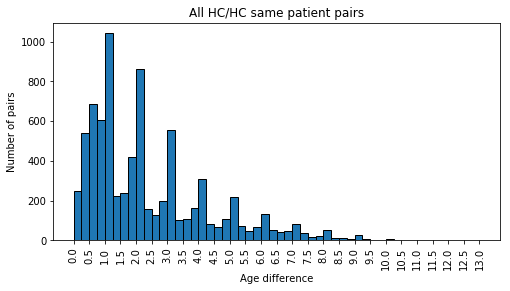

In [15]:
bins = np.linspace(0, 13, 13*4 + 1)
labels, diffs = all_age_differences(patients, ('healthy', 'healthy'), True)
print(len(diffs))
plt.figure(figsize=(8, 4))
plt.title("All HC/HC same patient pairs")
plt.xlabel("Age difference")
plt.ylabel("Number of pairs")
plt.xticks(np.linspace(0, 13, 13 * 2 + 1), rotation='vertical')
plt.hist(diffs, bins=bins, edgecolor='black')

In [9]:
# How many different patients per time difference
patient_diff = pd.DataFrame(data={'patient_label': labels, 'diff': diffs})

In [10]:
max_diff = 11
unique_patients = []
for i in range(len(bins) - 1):
    d = patient_diff.loc[(patient_diff['diff'] >= bins[i]) & (patient_diff['diff'] < bins[i + 1])]
    unique_patients.append(len(d.patient_label.unique()))

unique_patients

[604,
 350,
 400,
 344,
 515,
 181,
 203,
 273,
 494,
 125,
 103,
 115,
 300,
 88,
 93,
 98,
 193,
 58,
 54,
 69,
 130,
 51,
 40,
 46,
 71,
 41,
 36,
 34,
 50,
 28,
 16,
 15,
 37,
 11,
 12,
 6,
 22,
 6,
 3,
 3,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

Text(0,0.5,'Distinct patients')

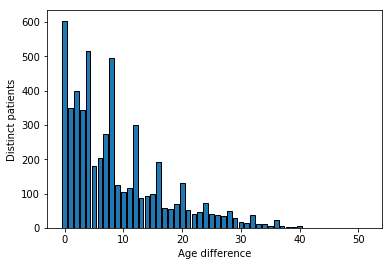

In [16]:
plt.bar(x=list(range(len(bins)-1)), height=unique_patients, edgecolor='black')
plt.xlabel("Age difference")
plt.ylabel("Distinct patients")

In [12]:
d = patient_diff.loc[patient_diff['diff'] == 1]
len(d.patient_label.unique())

154

In [13]:
len(unique_patients)

52

In [14]:
len(bins)

53

In [15]:
np.linspace(0, 13, 13 * 4 + 1)

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
        2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
        4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,
        6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,
        9.  ,  9.25,  9.5 ,  9.75, 10.  , 10.25, 10.5 , 10.75, 11.  ,
       11.25, 11.5 , 11.75, 12.  , 12.25, 12.5 , 12.75, 13.  ])

In [17]:
bins

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
        2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
        4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,
        6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,
        9.  ,  9.25,  9.5 ,  9.75, 10.  , 10.25, 10.5 , 10.75, 11.  ,
       11.25, 11.5 , 11.75, 12.  , 12.25, 12.5 , 12.75, 13.  ])

## Look at real images

In [6]:
import nibabel as nib

In [10]:
patients

array(['002_S_0295', '002_S_0413', '002_S_0559', ..., '990', '993', '995'],
      dtype=object)

In [11]:
len(patients)

2458

93     0
94     0
95     0
96     0
97     0
98     0
102    0
101    0
99     0
100    0
103    0
104    0
105    0
106    0
107    0
111    0
110    0
108    0
109    0
112    0
113    0
114    0
115    0
116    0
117    0
118    0
119    0
120    0
121    0
122    0
123    0
Name: healthy, dtype: int64


ValueError: num must be 1 <= num <= 9, not 10

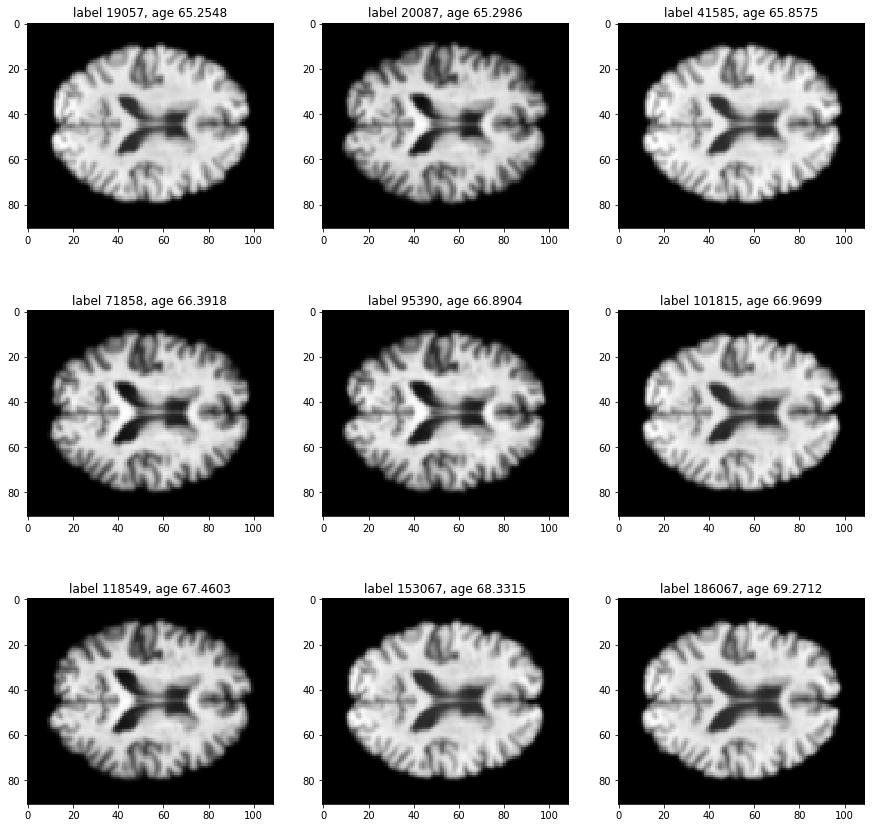

In [36]:
pat_idx = 5
sub = df.loc[df['patient_label'] == patients[pat_idx]]
sub = sub.sort_values(by=['age_exact'])

slice_idx = 60
rows = 3
columns = 3
fig = plt.figure(figsize=(15, 15))
#print(sub.age_exact)
last_age = -1
count = 1
print(sub.healthy)
for lab, age in zip(sub.image_label, sub.age_exact):
    if age == last_age:
        continue  # avoid test-restest images
    last_age = age
    image_path = "/local/ADNI_AIBL/ADNI_AIBL_T1_smoothed/all_images/{}_mni_aligned.nii.gz".format(lab)
    im = nib.load(image_path)
    data = im.get_data()
    fig.add_subplot(rows, columns, count)
    plt.title("label {}, age {}".format(lab, age))
    plt.imshow(data[:, :, 45], cmap='gray')
    count += 1

In [16]:
labels[:20], diffs[:20]

(['002_S_0295',
  '002_S_0295',
  '002_S_0295',
  '002_S_0295',
  '002_S_0295',
  '002_S_0295',
  '002_S_0295',
  '002_S_0295',
  '002_S_0295',
  '002_S_0295',
  '002_S_0295',
  '002_S_0295',
  '002_S_0295',
  '002_S_0295',
  '002_S_0295',
  '002_S_0295',
  '002_S_0295',
  '002_S_0295',
  '002_S_0295',
  '002_S_0295'],
 [0.542500000000004,
  1.1013999999999982,
  2.2657999999999987,
  3.0959000000000003,
  4.071200000000005,
  5.126000000000005,
  6.065799999999996,
  0.5588999999999942,
  1.7232999999999947,
  2.5533999999999963,
  3.5287000000000006,
  4.583500000000001,
  5.523299999999992,
  1.1644000000000005,
  1.9945000000000022,
  2.9698000000000064,
  4.024600000000007,
  4.964399999999998,
  0.8301000000000016,
  1.805400000000006])

In [49]:
def conversions(patients, min_max_age_gap):
    conv_dic = {}
    multiple_conversions = 0
    age_diffs = []
    for pat in patients:
        cur_df = df.loc[df.patient_label == pat]
        cur_df = cur_df.sort_values(by=['age_exact'])
        records = cur_df.to_dict('records')
        
        ages = [r["age_exact"] for r in records]
        assert all(ages[i] <= ages[i + 1] for i in range(len(records) - 1))
        max_age_gap = ages[-1] - ages[0]
        if max_age_gap < min_max_age_gap:
            continue
        
        def get_diag(rec):
            if rec["health_ad"] == 1:
                return "AD"
            elif rec["healthy"] == 1:
                return "HC"
            elif rec["health_mci"] == 1:
                return "MCI"
            else:
                raise ValueError("unknown diagnosis")
        
        n_changes = 0
        for i in range(1, len(records)):
            prev_d = get_diag(records[i - 1])
            cur_d = get_diag(records[i])
            
            if cur_d is not prev_d:
                n_changes += 1
                
        if n_changes > 1:
            multiple_conversions += 1
            continue
            
        conv = get_diag(records[0]) + "/" + get_diag(records[-1])
        if conv == "AD/AD":
            age_diffs.append(max_age_gap)
        if conv not in conv_dic:
            conv_dic[conv] = 1
        else:
            conv_dic[conv] += 1

    return conv_dic, multiple_conversions, age_diffs

In [54]:
res = conversions(patients, min_max_age_gap=2)
res

({'HC/HC': 449,
  'AD/AD': 151,
  'MCI/AD': 230,
  'MCI/MCI': 353,
  'MCI/HC': 33,
  'HC/MCI': 56,
  'HC/AD': 8,
  'AD/MCI': 3},
 45,
 [2.202699999999993,
  2.0738999999999947,
  2.0383999999999958,
  2.123299999999986,
  2.1699000000000126,
  2.1096000000000004,
  2.0767000000000024,
  2.2053999999999974,
  2.1233000000000004,
  2.0190999999999946,
  2.1452000000000027,
  2.235599999999991,
  2.0712000000000046,
  2.109499999999997,
  2.01100000000001,
  2.0302000000000078,
  2.0,
  2.0411,
  2.1041000000000025,
  2.0519999999999996,
  2.0246000000000066,
  2.032900000000012,
  2.1781000000000006,
  2.1260000000000048,
  2.0685000000000002,
  2.4739999999999895,
  2.0,
  2.065799999999996,
  2.147900000000007,
  2.109499999999997,
  2.282199999999989,
  2.046599999999998,
  2.0548,
  2.0356000000000023,
  2.065799999999996,
  2.180800000000005,
  2.0712000000000046,
  2.0356000000000023,
  2.0575000000000045,
  2.1314999999999884,
  2.0493000000000023,
  2.0685000000000002,
  2.109600

(array([130.,  32., 107.,  11.,   8., 135.,   4.,   8.,   0.,   4.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

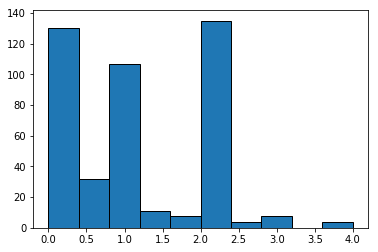

In [51]:
plt.hist(res[2], edgecolor='black')

## Conversion data availability

In [12]:
def conversion_data(patients, delta):
    conv_to_count = {}
    conv_to_patient = {}
    multiple_conversions = 0
    age_diffs = []
    for pat in patients:
        cur_df = df.loc[df.patient_label == pat]
        cur_df = cur_df.sort_values(by=['age_exact'])
        records = cur_df.to_dict('records')
        
        ages = [r["age_exact"] for r in records]
        assert all(ages[i] <= ages[i + 1] for i in range(len(records) - 1))
        
        def get_diag(rec):
            if rec["health_ad"] == 1:
                return "AD"
            elif rec["healthy"] == 1:
                return "HC"
            elif rec["health_mci"] == 1:
                return "MCI"
            else:
                raise ValueError("unknown diagnosis")
        
        n_changes = 0
        for i in range(1, len(records)):
            prev_d = get_diag(records[i - 1])
            cur_d = get_diag(records[i])
            
            if cur_d is not prev_d:
                n_changes += 1
                
        if n_changes > 1:
            multiple_conversions += 1
            continue
            
        target = ages[0] + delta
        pos = bisect.bisect_right(ages, target)
            
        conv = None
        if pos == len(ages):
            # can only use converting patient
            if n_changes == 1:
                conv = get_diag(records[0]) + "/" + get_diag(records[-1])
        else:
            d0 = get_diag(records[0])
            d1 = get_diag(records[pos])
            if (d0 == d1 and n_changes == 0) or (d0 is not d1):
                conv = d0 + "/" + d1
            
        if conv is None:
            continue
            
        if conv not in conv_to_count:
            conv_to_count[conv] = 1
            conv_to_patient[conv] = set([records[0]['patient_label']])
        else:
            conv_to_count[conv] += 1
            conv_to_patient[conv].add(records[0]['patient_label'])

    return conv_to_count, conv_to_patient, multiple_conversions

In [13]:
counts, conv_patients, _ = conversion_data(patients, delta=2)

In [14]:
counts

{'HC/HC': 436,
 'AD/AD': 140,
 'MCI/AD': 199,
 'MCI/MCI': 349,
 'MCI/HC': 30,
 'HC/MCI': 33,
 'HC/AD': 4,
 'AD/MCI': 2}

In [15]:
conv_patients["MCI/MCI"]

{'002_S_0782',
 '002_S_1155',
 '002_S_1268',
 '002_S_4229',
 '002_S_4237',
 '002_S_4447',
 '002_S_4473',
 '002_S_4654',
 '003_S_0908',
 '003_S_1122',
 '003_S_2374',
 '003_S_4354',
 '005_S_0324',
 '005_S_0448',
 '005_S_0546',
 '005_S_2390',
 '005_S_4185',
 '006_S_4363',
 '006_S_4679',
 '007_S_0414',
 '007_S_0698',
 '007_S_2394',
 '007_S_4272',
 '007_S_4467',
 '007_S_4611',
 '009_S_2208',
 '009_S_4359',
 '009_S_5000',
 '011_S_4235',
 '011_S_4893',
 '012_S_0634',
 '012_S_0932',
 '012_S_1165',
 '012_S_1175',
 '012_S_1321',
 '012_S_4012',
 '012_S_4128',
 '013_S_4985',
 '014_S_0169',
 '014_S_0557',
 '014_S_2185',
 '014_S_2308',
 '014_S_4263',
 '014_S_4328',
 '016_S_1028',
 '016_S_2031',
 '016_S_4646',
 '016_S_5007',
 '018_S_0142',
 '018_S_2133',
 '018_S_2155',
 '018_S_4809',
 '018_S_4868',
 '018_S_4889',
 '019_S_4285',
 '021_S_0273',
 '021_S_2077',
 '021_S_2100',
 '021_S_2124',
 '021_S_2125',
 '021_S_2142',
 '021_S_4744',
 '022_S_0004',
 '022_S_0961',
 '022_S_2167',
 '022_S_2379',
 '022_S_44

In [16]:
for delta in np.linspace(0, 10, 21)[1:]:
    counts, conv_patients, _ = conversion_data(patients, delta=delta)
    print(delta)
    print(counts)

0.5
{'HC/HC': 522, 'AD/AD': 305, 'MCI/MCI': 513, 'MCI/HC': 10, 'MCI/AD': 48, 'HC/AD': 2, 'HC/MCI': 11, 'AD/MCI': 1}
1.0
{'HC/HC': 491, 'AD/AD': 263, 'MCI/AD': 107, 'MCI/MCI': 470, 'MCI/HC': 23, 'HC/MCI': 17, 'HC/AD': 3, 'AD/MCI': 1}
1.5
{'HC/HC': 456, 'AD/AD': 160, 'MCI/AD': 167, 'MCI/MCI': 381, 'MCI/HC': 28, 'HC/MCI': 28, 'HC/AD': 3, 'AD/MCI': 2}
2.0
{'HC/HC': 436, 'AD/AD': 140, 'MCI/AD': 199, 'MCI/MCI': 349, 'MCI/HC': 30, 'HC/MCI': 33, 'HC/AD': 4, 'AD/MCI': 2}
2.5
{'HC/HC': 290, 'MCI/AD': 232, 'MCI/MCI': 195, 'MCI/HC': 34, 'HC/MCI': 43, 'HC/AD': 5, 'AD/AD': 13, 'AD/MCI': 2}
3.0
{'HC/HC': 263, 'MCI/AD': 235, 'MCI/MCI': 184, 'MCI/HC': 34, 'HC/MCI': 45, 'HC/AD': 6, 'AD/AD': 5, 'AD/MCI': 2}
3.5
{'HC/HC': 213, 'MCI/AD': 254, 'MCI/MCI': 119, 'MCI/HC': 36, 'HC/MCI': 48, 'HC/AD': 7, 'AD/MCI': 3, 'AD/AD': 4}
4.0
{'HC/HC': 175, 'MCI/AD': 254, 'MCI/MCI': 112, 'MCI/HC': 37, 'HC/MCI': 49, 'HC/AD': 7, 'AD/MCI': 3}


KeyboardInterrupt: 

## Extend meta info csv

In [17]:
new_df = df.copy()

In [18]:
for delta in range(2, 4):
    counts, conv_patients, _ = conversion_data(patients, delta=delta)
    total = 0
    new_col = []
    for index, row in new_df.iterrows():
        patient_label = row['patient_label']
        # find conv
        convs = ["MCI/MCI", "MCI/AD"]
        c = None
        for conv in convs:
            if patient_label in conv_patients[conv]:
                c = conv

        val = -1
        if c is not None:
            total += 1
            if c == convs[0]:
                val = 0
            else:
                val = 1
        new_col.append(val)

    new_df["mci_ad_conv_delta_{}".format(str(delta).replace(".", "_"))] = new_col

In [38]:
total

6775

In [11]:
new_df[new_df["mci_ad_conv_delta_2"] == 1].patient_label.unique().flatten().tolist()

['002_S_0729',
 '002_S_0954',
 '002_S_1070',
 '003_S_1057',
 '005_S_0222',
 '005_S_0572',
 '006_S_0675',
 '006_S_1130',
 '006_S_4515',
 '007_S_0041',
 '007_S_0101',
 '007_S_0128',
 '007_S_0249',
 '007_S_0293',
 '007_S_0344',
 '007_S_2106',
 '009_S_2381',
 '009_S_4530',
 '009_S_4958',
 '010_S_0904',
 '011_S_0241',
 '011_S_0856',
 '011_S_0861',
 '011_S_1282',
 '011_S_4366',
 '012_S_1033',
 '012_S_1292',
 '012_S_4094',
 '013_S_0240',
 '013_S_0325',
 '013_S_0860',
 '013_S_4595',
 '014_S_0658',
 '014_S_4058',
 '014_S_4079',
 '014_S_4668',
 '016_S_0769',
 '016_S_1121',
 '016_S_1326',
 '016_S_4584',
 '016_S_4902',
 '016_S_5031',
 '018_S_0057',
 '019_S_4293',
 '019_S_4680',
 '021_S_0141',
 '021_S_0231',
 '021_S_4402',
 '021_S_4857',
 '022_S_0750',
 '022_S_1394',
 '023_S_0030',
 '023_S_0042',
 '023_S_0217',
 '023_S_0388',
 '023_S_0604',
 '023_S_0625',
 '023_S_0855',
 '023_S_0887',
 '023_S_1126',
 '023_S_1247',
 '023_S_4035',
 '023_S_4243',
 '023_S_4502',
 '023_S_4796',
 '024_S_1393',
 '027_S_01

In [21]:
new_df.to_csv('adni_aibl_conversion.csv', index=False)

In [16]:
patients_conv = new_df[new_df["mci_ad_conv_delta_2"] == 0].patient_label.unique().flatten()
with open("mci_ad_conv_2_0.txt", 'w') as f:
    for pid in patients_conv:
        f.write("{}\n".format(pid))

In [13]:
patients_conv

array(['002_S_0729', '002_S_0954', '002_S_1070', '003_S_1057',
       '005_S_0222', '005_S_0572', '006_S_0675', '006_S_1130',
       '006_S_4515', '007_S_0041', '007_S_0101', '007_S_0128',
       '007_S_0249', '007_S_0293', '007_S_0344', '007_S_2106',
       '009_S_2381', '009_S_4530', '009_S_4958', '010_S_0904',
       '011_S_0241', '011_S_0856', '011_S_0861', '011_S_1282',
       '011_S_4366', '012_S_1033', '012_S_1292', '012_S_4094',
       '013_S_0240', '013_S_0325', '013_S_0860', '013_S_4595',
       '014_S_0658', '014_S_4058', '014_S_4079', '014_S_4668',
       '016_S_0769', '016_S_1121', '016_S_1326', '016_S_4584',
       '016_S_4902', '016_S_5031', '018_S_0057', '019_S_4293',
       '019_S_4680', '021_S_0141', '021_S_0231', '021_S_4402',
       '021_S_4857', '022_S_0750', '022_S_1394', '023_S_0030',
       '023_S_0042', '023_S_0217', '023_S_0388', '023_S_0604',
       '023_S_0625', '023_S_0855', '023_S_0887', '023_S_1126',
       '023_S_1247', '023_S_4035', '023_S_4243', '023_S

In [15]:
f.close()

## Add number of conversions to csv

In [1]:
def number_conversions(patients):
    patient_to_n_convs = {}
    for pat in patients:
        cur_df = df.loc[df.patient_label == pat]
        cur_df = cur_df.sort_values(by=['age_exact'])
        records = cur_df.to_dict('records')
        
        ages = [r["age_exact"] for r in records]
        assert all(ages[i] <= ages[i + 1] for i in range(len(records) - 1))
        
        def get_diag(rec):
            if rec["health_ad"] == 1:
                return "AD"
            elif rec["healthy"] == 1:
                return "HC"
            elif rec["health_mci"] == 1:
                return "MCI"
            else:
                raise ValueError("unknown diagnosis")
        
        n_changes = 0
        for i in range(1, len(records)):
            prev_d = get_diag(records[i - 1])
            cur_d = get_diag(records[i])
            
            if cur_d != prev_d:
                n_changes += 1
                
        patient_to_n_convs[records[0]["patient_label"]] = n_changes

    return patient_to_n_convs

In [26]:
number_convs = number_conversions(patients)

In [27]:
df_with_conv = pd.read_csv("adni_aibl_conversion.csv")

In [28]:
n_conv_col = []
for index, row in df_with_conv.iterrows():
    patient_label = row["patient_label"]
    n_conv_col.append(number_convs[patient_label])

In [29]:
df_with_conv["n_conversions"] = np.array(n_conv_col)
df_with_conv.to_csv("adni_aibl_conv2.csv", index=False)

In [27]:
df_with_conv[df_with_conv["n_conversions"] == 2].patient_label.unique()

array(['002_S_4262', '002_S_4799', '003_S_1074', '005_S_0223',
       '011_S_4845', '012_S_1009', '023_S_0061', '024_S_0985',
       '029_S_4385', '031_S_4005', '036_S_4899', '037_S_0467',
       '037_S_4214', '037_S_4381', '037_S_4706', '041_S_4041',
       '051_S_1123', '053_S_4813', '067_S_2301', '094_S_1241',
       '100_S_0069', '123_S_0106', '123_S_0162', '127_S_4624',
       '128_S_0522', '128_S_1408', '128_S_2123', '128_S_4607',
       '129_S_0778', '131_S_0123', '136_S_0429', '137_S_0722',
       '137_S_0972', '153', '315', '740'], dtype=object)

In [1]:
df_with_conv

NameError: name 'df_with_conv' is not defined

In [30]:
df = pd.read_csv('data/raw/csv/adni_aibl_conv2.csv')

In [32]:
len(df[df["mci_ad_conv_delta_3"] == 0].patient_label.unique())

184